In [10]:
size=25

number of dots in sine wave 500000


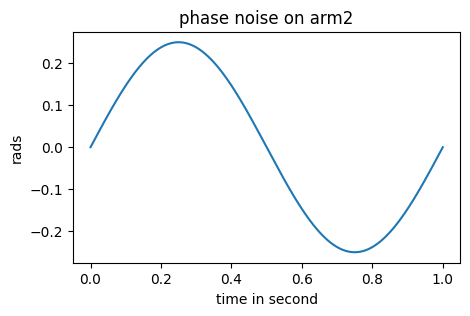

In [11]:
#phase noise on arm2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
amplitude_sine1=(1/4)*np.pi
amplitude_sine2=(3/2)*np.pi
time_range=1
period_sine=1
num_period_sine=int(time_range/period_sine)
samples_per_period=500000
time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period, endpoint=False)
phase_noise=amplitude_sine1*(np.sin(2*np.pi * time))


#phase_noise=2.8*time
plt.figure(figsize=(5,3))
plt.plot(time, phase_noise/np.pi)


plt.title("phase noise on arm2")
plt.ylabel("rads",fontsize=10)
plt.xlabel("time in second",fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

print("number of dots in sine wave",num_period_sine*samples_per_period)


#plt.plot(t, )
#plt.ylim(-2, 2)

Minimum element is -314.1592653589793
Maximum element is 314.1592653589793


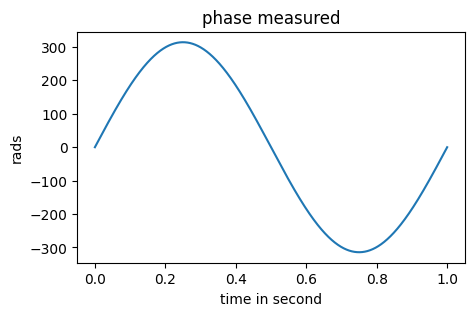

In [24]:
#reconstruct phase
import numpy as np
import cmath
import math

phase_measure_each = np.empty(len(phase_noise)) 
phase_measure = np.empty(len(phase_noise)) 
phase_error = np.empty(len(phase_noise)) 

#calculate the field after first directional coupler
r=1/math.sqrt(2); #cross_coupling_coefficient for the directional coupler (0.707 is 1/sqrt(2)) 
t=math.sqrt(1-r**2); #optical_field_transmission
transfer_directional_coupler=np.matrix([[t,r*1j],[r*1j,t]]) #transfer matrix for directional coupler 3dB coupler

#setup the system
matrixs2=np.dot([1,0],transfer_directional_coupler); #incident on the first arm

#analyze the ER influence
Ey_arm1=0.5**0.5;
Ey_arm2=Ey_arm1

#assume we correct phase after each measurement
for i in range(0, len(phase_noise)):
    
    #assume we correct phase after each measurement
    if i==0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]*np.exp(1j*phase_noise[i])];
    elif i>0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]*np.exp(1j*(phase_noise[i]-phase_noise[i-1]))];
    #print('E_arm1, E_arm2 =',Ey_arm1_Ey_arm2)

    #phase shifter %%%%% need to use rad in the matrix 
    phase_angle_one=0; #arm1
    phase_angle_two=math.pi/2;   
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two))]]);

    ######## setup the system
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;

    #######results
    theta1=math.degrees(np.angle(matrixs3[0,0])); theta2=math.degrees(np.angle(matrixs3[0,1]));
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    E1_and_E2=[E1,E2]; 
    I1_and_I2=[E1**2,E2**2];
    I_diff=I1_and_I2[1]-I1_and_I2[0];
    theta1_and_theta2=[theta1,theta2];
    #print('I_diff=',I_diff)
    #print('theta1_and_theta2=',theta1_and_theta2)
    #print('I1_and_I2=',I1_and_I2);

    phase_measure_each[i]=np.arccos(I_diff)-math.pi/2
    if i>0:
        phase_measure[i]=phase_measure[i-1]+phase_measure_each[i]
    elif i==0:
        phase_measure[i]=phase_measure_each[i]

    phase_error[i]=phase_measure[i]-phase_noise[i]
    
time = np.linspace(0, num_period_sine*period_sine, num_period_sine*samples_per_period, endpoint=False)

plt.figure(figsize=(5,3))
plt.plot(time, phase_measure)
plt.title("phase measured")
plt.ylabel("rads",fontsize=10)
plt.xlabel("time in second",fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

def getMinMax(arr):
    arr.sort()
    minmax = {"min": arr[0], "max": arr[-1]}
    return minmax

minmax = getMinMax(phase_measure) 
print("Minimum element is", minmax["min"])
print("Maximum element is", minmax["max"])



number of dots in square wave 500000


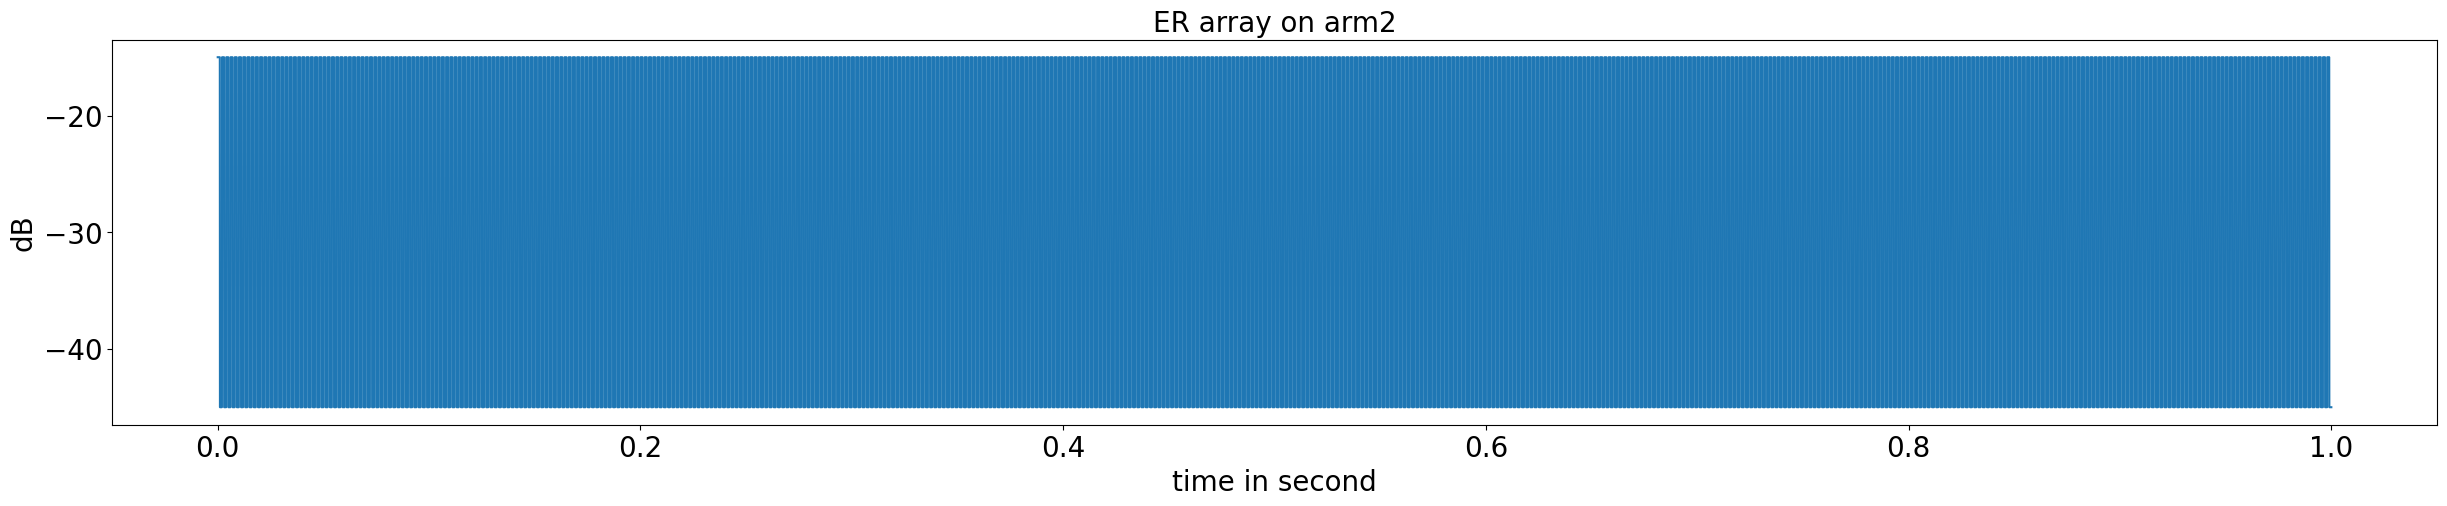

In [25]:
#create ER array
from scipy import signal
frequency_square=500
period_square=1/frequency_square
num_period_square=int(time_range/period_square)
samples_per_period=1000
time2 = np.linspace(0, num_period_square*period_square, num_period_square*samples_per_period, endpoint=False)
ER_array=15*signal.square((2 * np.pi)* frequency_square*time2,duty=0.5)-30
#plt.figure(figsize=(30,3))
plt.figure(figsize=(30,5))
plt.plot(time2, ER_array)
plt.title("ER array on arm2",fontsize=size)
plt.ylabel("dB",fontsize=size)
plt.xlabel("time in second",fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=size)

print("number of dots in square wave",num_period_square*samples_per_period)


500000
measuring frequency= 500000.0 Hz
50*wavelength= 314.1592653589793 rad
Minimum element is -311.66150277917586
Maximum element is 311.6445979040791


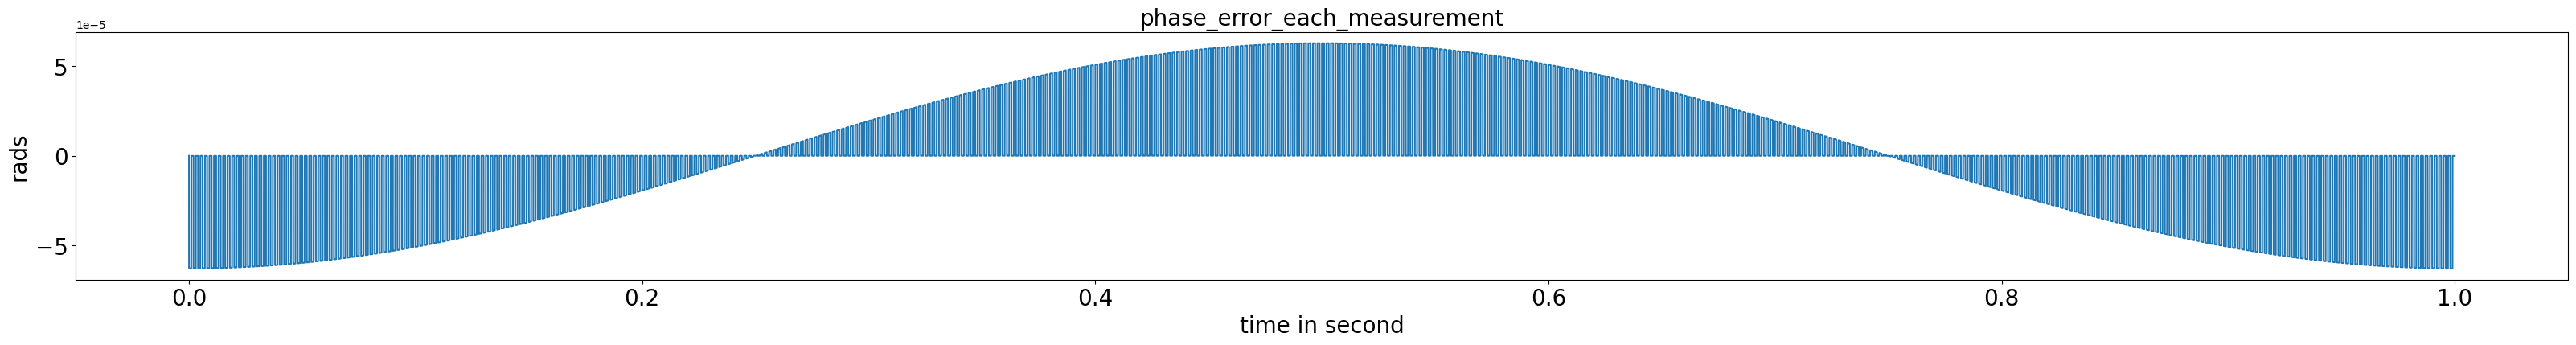

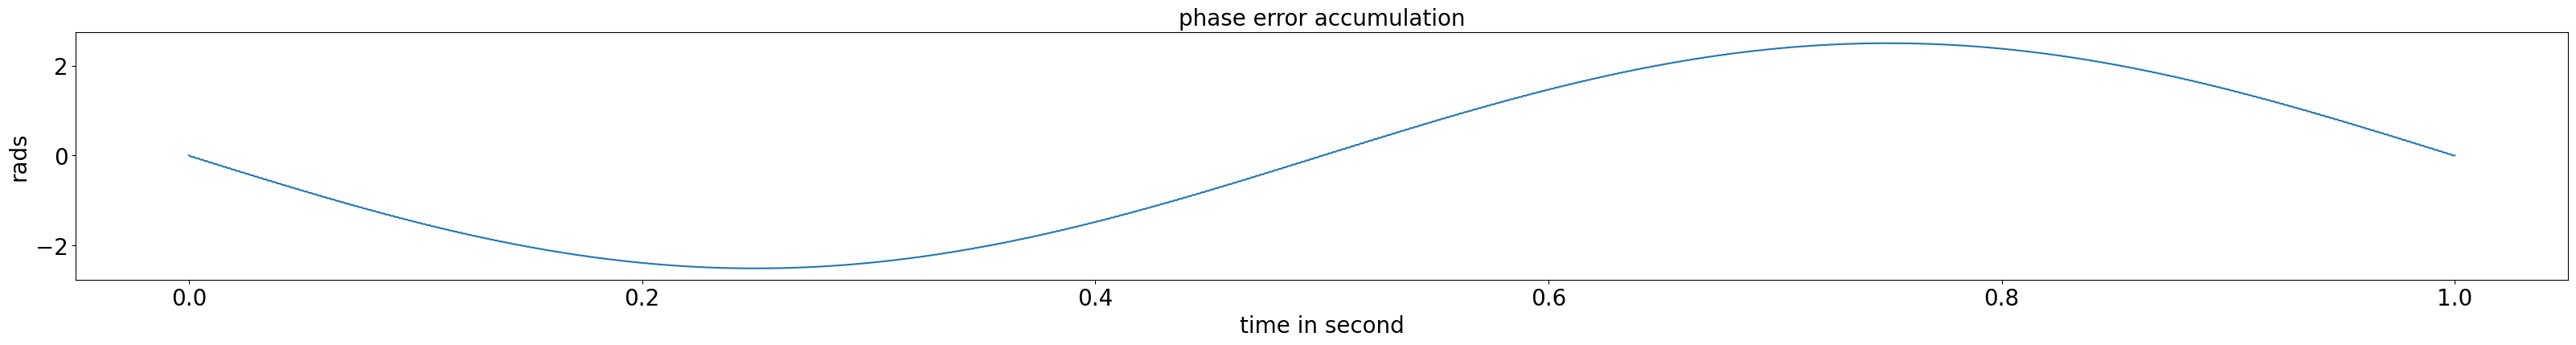

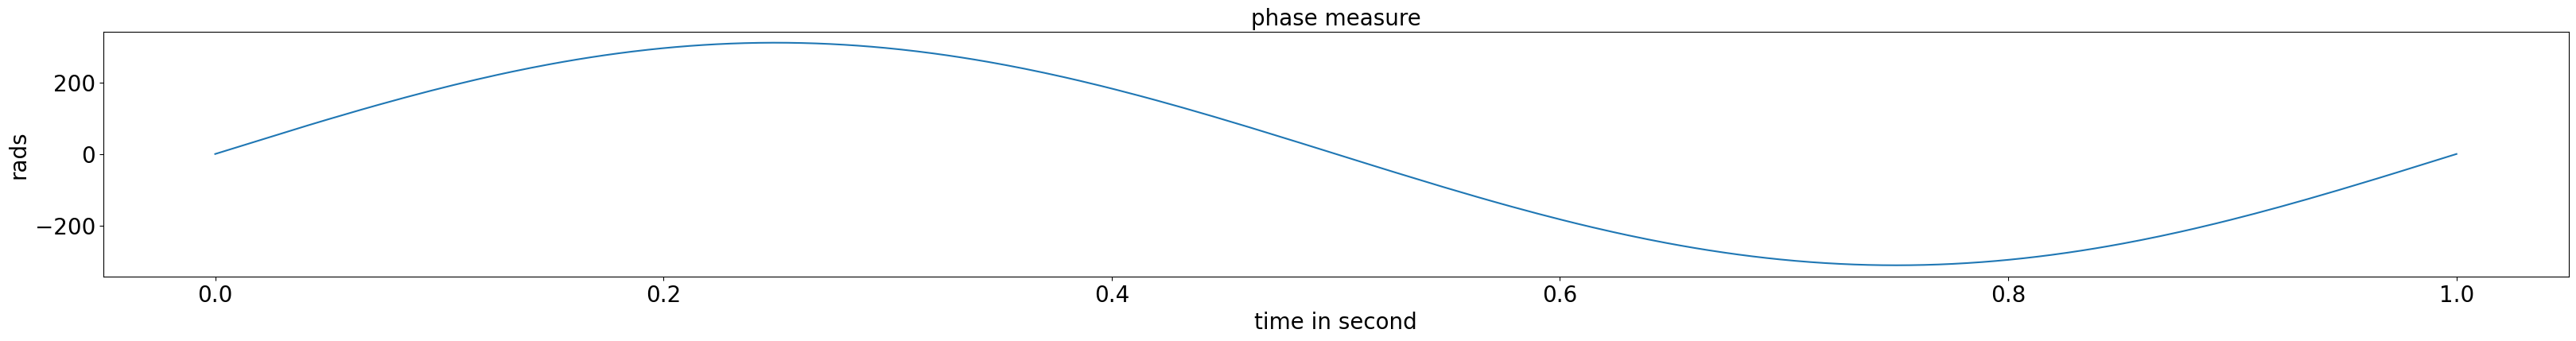

In [26]:
size=20
#phase error when consider ER
import numpy as np
import cmath
import math

phase_measure_each = np.empty(len(phase_noise)) 
phase_measure = np.empty(len(phase_noise)) 
phase_error_each = np.empty(len(phase_noise)) 
phase_error_accumulate= np.empty(len(phase_noise)) 

#setup the system
matrixs2=np.dot([1,0],transfer_directional_coupler); #incident on the first arm
Ey_arm1=0.5**0.5;

for i in range(0, len(phase_noise)):
    
    #assume we correct phase after each measurement
    #consider ER
    Ey_arm2=(0.5*(1-10**(ER_array[i]/10)))**0.5;
    if i==0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]*(1/Ey_arm1)*Ey_arm2*np.exp(1j*phase_noise[i])];
    elif i>0:
        Ey_arm1_Ey_arm2=[matrixs2[0,0],matrixs2[0,1]*(1/Ey_arm1)*Ey_arm2*np.exp(1j*(phase_noise[i]-phase_noise[i-1]))];
    #print('E_arm1, E_arm2 =',Ey_arm1_Ey_arm2)

    #phase shifter %%%%% need to use rad in the matrix 
    phase_angle_one=0; #arm1
    phase_angle_two=math.pi/2;   
    phase_shifter=np.matrix([[np.exp(1j*(phase_angle_one)),0],[0,np.exp(1j*(phase_angle_two))]]);#choose the phase =(-nn+1)*pi/100

    ######## setup the system
    matrixs3=Ey_arm1_Ey_arm2@phase_shifter@transfer_directional_coupler;

    #######results
    theta1=math.degrees(np.angle(matrixs3[0,0])); theta2=math.degrees(np.angle(matrixs3[0,1]));
    E1=abs(matrixs3[0,0]);
    E2=abs(matrixs3[0,1]);
    E1_and_E2=[E1,E2]; 
    I1_and_I2=[E1**2,E2**2];
    I_diff=I1_and_I2[1]-I1_and_I2[0];
    theta1_and_theta2=[theta1,theta2];
    #print('I_diff=',I_diff)
    #print('theta1_and_theta2=',theta1_and_theta2)
    #print('I1_and_I2=',I1_and_I2);

    #phase measure each; phase mesure accumulate
    phase_measure_each[i]=np.arccos(I_diff)-math.pi/2
    if i>0:
        phase_measure[i]=phase_measure[i-1]+phase_measure_each[i]
    elif i==0:
        phase_measure[i]=phase_measure_each[i]

    #phase error each; phase error accumulate
    if i>0:
        phase_error_each[i]=phase_measure_each[i]-(phase_noise[i]-phase_noise[i-1])
        phase_error_accumulate[i]=phase_error_accumulate[i-1]+phase_error_each[i]
    elif i==0:
        phase_error_each[i]=phase_measure_each[i]-(phase_noise[i])
        phase_error_accumulate[i]=phase_error_each[i]
    

plt.figure(figsize=(40,4))
plt.plot(time, phase_error_each)
plt.title("phase_error_each_measurement",fontsize=size)
plt.ylabel("rads",fontsize=size)
plt.xlabel("time in second",fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=size)

plt.figure(figsize=(40,4))
plt.plot(time, phase_error_accumulate)
plt.title("phase error accumulation",fontsize=size)
plt.ylabel("rads",fontsize=size)
plt.xlabel("time in second",fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=size)

plt.figure(figsize=(40,4))
plt.plot(time, phase_measure)
plt.title("phase measure",fontsize=size)
plt.ylabel("rads",fontsize=size)
plt.xlabel("time in second",fontsize=size)
plt.tick_params(axis='both', which='major', labelsize=size)

print(len(phase_noise))
print("measuring frequency=",len(phase_noise)/time_range,"Hz")
print("50*wavelength=",50*2*math.pi,"rad")

minmax = getMinMax(phase_measure) 
print("Minimum element is", minmax["min"])
print("Maximum element is", minmax["max"])


In [22]:
this is End of the file

SyntaxError: invalid syntax (2612320938.py, line 1)

In [68]:
minmax = getMinMax(phase_error_accumulate) 
print("Minimum element is", minmax["min"])
print("Maximum element is", minmax["max"])

Minimum element is -0.022337507588027883
Maximum element is 0.0


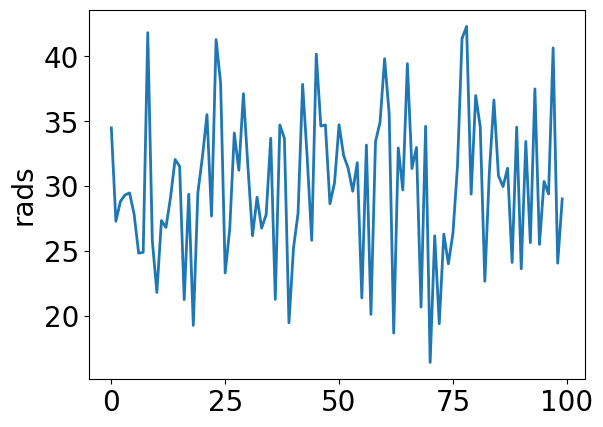

In [67]:
#create ER array
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(100)*5+30
plt.plot(data)
plt.ylabel("rads",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

In [1]:

# Aleternative way how can complex no can initialize
# importing "cmath" for complex number operations
import cmath
n=3 
# Initializing complex number
z = 5+n*1j
# Print the parts of Complex No.
print("The real part of complex number is : ", end="")
print(z)
 
print("The imaginary part of complex number is : ", end="")
print(z.imag)

The real part of complex number is : (5+3j)
The imaginary part of complex number is : 3.0


#### 